## Generation

In [1]:
#%history -g 



In [2]:
from code_perm import naive_approach,fitting, utility
import os
os.getcwd() 
from code_perm import naive_approach,fitting, utility

import random

NA : 
[106.0, (('Maria', 'Manager'), ('Michael', 'Lead Developer'), ('Josh', 'Secretary'))]
[[ 80. 115.  26.]
 [ 20.  28.  10.]
 [ 52.  74.  16.]]
lsa---------------------
[0 1 2] [1 2 0] 177.0
munkres---------------------
[(0, 1), (1, 2), (2, 0)]
Lowest cost through this matrix:
[ 36.0,   1.0,  90.0]
[ 96.0,  88.0, 106.0]
[ 64.0,  42.0, 100.0]
(0, 1) -> 1.0
(1, 2) -> 106.0
(2, 0) -> 64.0
total cost:  171.0
munkres2---------------------
Highest profit through this matrix:
[ 80.0, 115.0,  26.0]
[ 20.0,  28.0,  10.0]
[ 52.0,  74.0,  16.0]
(0, 1) -> 115.0
(1, 2) -> 10.0
(2, 0) -> 52.0
total profit=177.0


In [17]:
# number of series of applicants
nsapp = 11

#steps between serie sizes
nsapp_step = 1

#number of comptencies
ncomp = 3


In [18]:
#generate sets of n applicants and n jobs with ncopms competencies    
def generate(n):
    apps = {}
    jobs = {}
    for i in range(n):
        key,val = gen_app(i)
        apps[key] = val
        key,val = gen_job(i)
        jobs[key] = val
    return apps, jobs

def gen_app(i):
   
    key = 'applicant '+ str(i) 
    comps ={}
    for j in range(1,ncomp):
        comps['comp ' + str(j)] = (random.randint(0, 12))
    return key, comps


def gen_job(i):
   
    key = 'job '+ str(i) 
    comps ={}
    for j in range(1,ncomp):
        comps['comp ' + str(j)] = (random.randint(0, 12))
    return key, comps

In [19]:
job_series = []
app_series = []
for i in range(3,nsapp,nsapp_step):
    print(i)
    apps, jobs = generate(i)
    job_series.append(jobs)
    app_series.append(apps)


3
4
5
6
7
8
9
10


In [20]:
#naive approach
from itertools import permutations
def bench_naive(app_serie,job_serie):
    unique_applist=sorted(list(set(app_serie)))
    unique_joblist=sorted(list(set(job_serie)))
    uniq_app_perm =  list(permutations(unique_applist))

    lst=[]
    for i in uniq_app_perm:
        lst.append(tuple(zip(i,unique_joblist)))
    res, res_tpl = naive_approach(lst,app_serie,job_serie)
    return res, res_tpl

In [21]:
#linear sum assignment
import numpy as np
from scipy.optimize import linear_sum_assignment
def bench_lsa(app_serie,job_serie):
  
    grades = {}
    for i in app_serie:
        grades[i] = {}
        for j in job_serie:
            grades[i][j] = fitting(tuple((i,j)),app_serie,job_serie)

    m = np.array([[grades[app][job] for job in sorted(grades[app])] for app in sorted(grades)])
    maxn = m.max() + 1.0
    row_ind, col_ind = linear_sum_assignment(m, maximize=True)
    sum_val = m[row_ind, col_ind].sum()
    return sum_val, row_ind, col_ind

In [22]:
#munkres
from munkres import Munkres, print_matrix
def bench_munkres(app_serie,my_new_df_jobs):
    grades = {}
    for i in app_serie:
        grades[i] = {}
        for j in job_serie:
            grades[i][j] = fitting(tuple((i,j)),app_serie,job_serie)

    m = np.array([[grades[app][job] for job in sorted(grades[app])] for app in sorted(grades)])
    maxn = m.max() + 1.0
    #print(maxn)
    m_lst = (maxn -m).tolist()
    munk = Munkres()

    indexes = munk.compute(m_lst)
    #print(indexes)
    #print_matrix(m_lst, msg='Lowest cost through this matrix:')
    total = 0
    row_ind = []
    col_ind = []
    for row, column in indexes:
        value = m_lst[row][column]
        total += value
        #print(f'({row}, {column}) -> {value}')
        row_ind.append(row)
        col_ind.append(column)
    #print('total cost: ',total)
    return total, row_ind, col_ind

In [23]:
# number of series
n = len(job_series)
print( n)

#benchmark
import time

lst_n = []
lst_naive = []
lst_lsa = []
lst_munkres = []

for i in range(n):
    app_serie = app_series[i]
    job_serie = job_series[i]
    lst_n.append(len(job_series[i]))
    
    t0 = time.time()
    #print(app_serie)
    _, _ = bench_naive(app_serie,job_serie)
    t1 = time.time()
    total = t1-t0
    lst_naive.append(total)
    
    t0 = time.time()
    _, _, _ = bench_lsa(app_serie,job_serie)
    t1 = time.time()
    total = t1-t0
    lst_lsa.append(total)
    
    t0 = time.time()
    _, _, _ = bench_munkres(app_serie,job_serie)
    t1 = time.time()
    total = t1-t0
    lst_munkres.append(total)
    
    #print(job_series)
    #print(app_series)

8


In [24]:
print(lst_n)
print(lst_naive)
print(lst_munkres)
print(lst_lsa)

[3, 4, 5, 6, 7, 8, 9, 10]
[0.0, 0.0, 0.0, 0.015596866607666016, 0.03777909278869629, 0.31491827964782715, 3.2602500915527344, 36.85256576538086]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002089262008666992, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


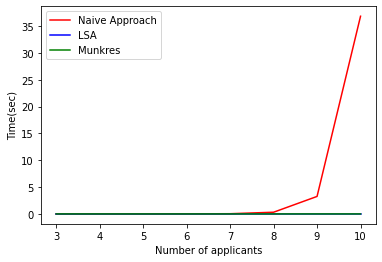

In [25]:
import matplotlib.pyplot as plt

plt.plot(lst_n, lst_naive, 'r',label = 'Naive Approach') # plotting t, a separately 
plt.plot(lst_n, lst_lsa, 'b',label='LSA') # plotting t, b separately 
plt.plot(lst_n, lst_munkres, 'g',label='Munkres') # plotting t, c separately 
plt.xlabel("Number of applicants")
plt.ylabel("Time(sec)")
plt.legend()
plt.show()

In [12]:
ngapp = 200
ngapp_step = 20

In [13]:
job_series = []
app_series = []
for i in range(3,ngapp,ngapp_step):
    print(i)
    apps, jobs = generate(i)
    job_series.append(jobs)
    app_series.append(apps)


3
23
43
63
83
103
123
143
163
183


In [14]:
n = len(job_series)
print( n)
import time

lst_n = []
lst_lsa = []
lst_munkres = []

for i in range(n):
    app_serie = app_series[i]
    job_serie = job_series[i]
    lst_n.append(len(app_series[i]))
    
        
    t0 = time.time()
    _, _, _ = bench_lsa(app_serie,job_serie)
    t1 = time.time()
    total = t1-t0
    lst_lsa.append(total)
    
    t0 = time.time()
    _, _, _ = bench_munkres(app_serie,job_serie)
    t1 = time.time()
    total = t1-t0
    lst_munkres.append(total)
    

10


In [15]:
print(lst_n)
print(lst_munkres)
print(lst_lsa)

[3, 23, 43, 63, 83, 103, 123, 143, 163, 183]
[0.0, 0.04686689376831055, 0.19661355018615723, 0.602287769317627, 1.1190986633300781, 2.0258243083953857, 3.17248797416687, 4.403265476226807, 6.2883453369140625, 8.268282890319824]
[0.0, 0.0, 0.0, 0.008068561553955078, 0.010162353515625, 0.012351274490356445, 0.020241260528564453, 0.030389070510864258, 0.030657529830932617, 0.04902458190917969]


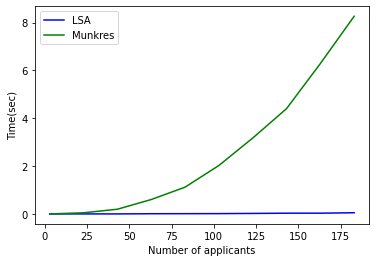

In [16]:
import matplotlib.pyplot as plt

#plt.plot(lst_n, lst_naive, 'r') # plotting t, a separately 
plt.plot(lst_n, lst_lsa, 'b', label='LSA') # plotting t, b separately 
plt.plot(lst_n, lst_munkres, 'g', label = 'Munkres') # plotting t, c separately 
plt.xlabel("Number of applicants")
plt.ylabel("Time(sec)")
plt.legend()
plt.show()